# Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astropy.visualization import simple_norm
from astropy.wcs import WCS
import numpy as np

# Single data

In [6]:
df = pd.read_csv('../data/604826.csv', comment='#')
df

ALPHA_J2000  DELTA_J2000    FLUX_AUTO  FLUX_RELERR_AUTO  CLASS_STAR  \
0        215.231831    52.898138  1490.617920          0.019974       0.743   
1        214.894545    53.097003    94.664742          0.248657       0.489   
2        215.091284    52.979154    61.705227          0.310547       0.379   
3        215.207562    52.909093   900.460815          0.034485       0.840   
4        215.490903    53.493301    42.644035          0.594238       0.470   
...             ...          ...          ...               ...         ...   
604565   214.515393    52.745339    79.415420          0.074951       0.521   
604566   214.812878    52.561756    52.774242          0.072021       0.269   
604567   214.689575    52.637103    14.581264          0.144287       0.509   
604568   214.757007    52.595075     9.663751          0.207642       0.525   
604569   214.250261    52.317629    19.758976          0.136597       0.564   

        TILE_ID  FILTER_ID  
0          2351          1  
1          2351          1  
2          2351          1  
3          2351          1  
4          2351          1  
...         ...        ...  
604565     2242         60  
604566     2242         60  
604567     2242         60  
604568     2242         60  
604569     2242         60  

[604570 rows x 7 columns]

In [19]:
df.value_counts('FILTER_ID')

FILTER_ID
59    24614
60    21503
30    20959
31    20626
35    16658
28    15455
36    15409
50    14996
32    14908
29    14224
38    13869
39    13710
34    11974
17    11943
10    11454
24    11060
43    10928
58    10830
51    10631
33    10590
46    10587
25    10530
56    10369
41    10003
47     9962
45     9681
22     9555
44     9283
19     9091
14     9063
27     9009
21     8990
42     8882
49     8872
40     8801
37     8734
15     8677
18     8596
48     8595
55     8555
26     8325
3      8267
11     8162
52     7975
54     7874
7      7429
8      7136
53     6934
12     6709
23     6606
20     6483
4      5860
13     5703
16     5512
1      5015
2      4507
9      4351
5      4135
6      3896
57     1515
Name: count, dtype: int64

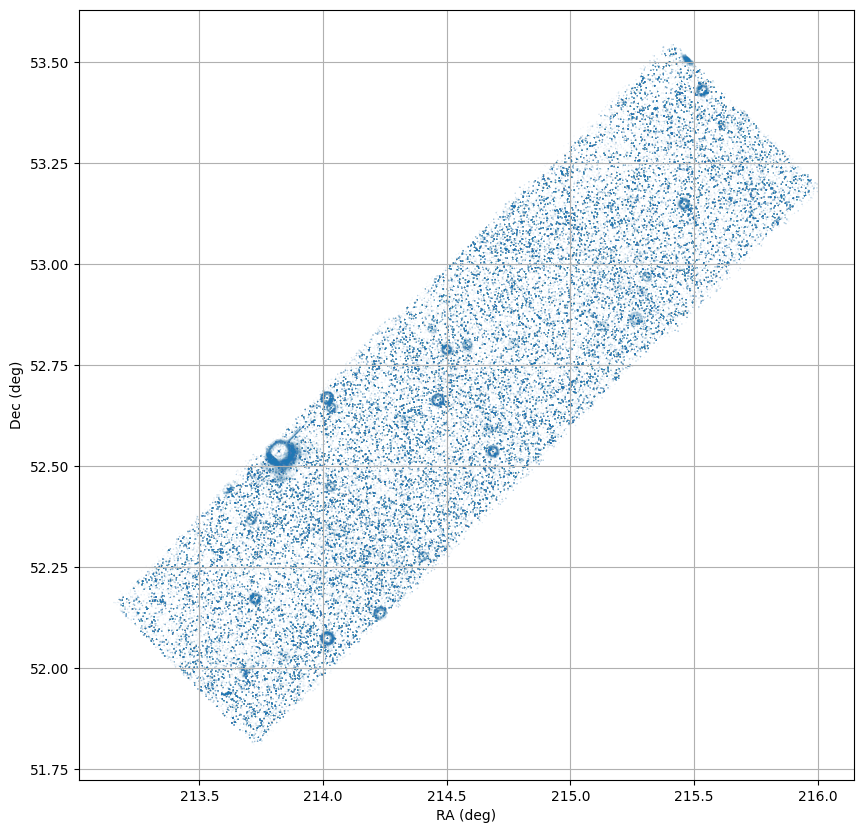

In [18]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df['ALPHA_J2000'], y=df['DELTA_J2000'], s=1, 
            alpha=0.05, edgecolors='none')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.grid()
plt.show()

# Dula data

In [2]:
df_dual = pd.read_csv('../data/604827.csv', comment='#')
df_dual

ALPHA_J2000  DELTA_J2000  \
0       214.881557    53.103476   
1       214.861588    53.115839   
2       215.061658    52.998000   
3       215.180854    52.927186   
4       214.907509    53.089148   
...            ...          ...   
64288   215.064895    52.812546   
64289   214.688544    53.040802   
64290   215.186475    52.737363   
64291   215.084326    52.799349   
64292   215.068525    52.809148   

                                               FLUX_AUTO  \
0      182.865799 48.724514 88.6793365 0.0 0.0 -6.065...   
1      -1.43247414 -5.36248398 -13.7104988 -3.3015868...   
2      60.7909508 -10.184761 11.6957092 2.27859354 2....   
3      -2.15251517 0.169828132 -14.6118746 3.21706223...   
4      18.92099 4.24113035 16.713026 7.06329823 10.50...   
...                                                  ...   
64288  10.4889164 -10.5139389 22.524107 42.2049637 37...   
64289  -15.3364697 43.9341125 0.500564694 9.28878117 ...   
64290  32.1980095 23.9194908 24.1457367 75.9638672 73...   
64291  34.7161293 34.0826416 10.7551117 18.9449844 47...   
64292  13.473361 17.2105522 19.2490139 24.3374424 40....   

                                        FLUX_RELERR_AUTO  CLASS_STAR  TILE_ID  
0      0.358887 1.130859 0.291016 0.0 0.0 -3.511719 0...       0.676     2406  
1      -10.078125 -1.453125 -0.279297 -0.666504 0.0 1...       0.516     2406  
2      0.522461 -0.840332 0.762207 0.0 0.0 1.136719 0...       0.685     2406  
3      -5.394531 112.625 -0.611816 0.0 0.0 1.46582 0....       0.573     2406  
4      3.087891 10.367188 1.134766 3.466797 0.0 0.645...       0.750     2406  
...                                                  ...         ...      ...  
64288  3.138672 -1.167969 0.703125 0.546387 0.820312 ...       0.160     2243  
64289  -0.79248 0.48584 25.78125 1.992188 -1.319336 -...       0.358     2243  
64290  0.785645 0.862305 0.494141 0.230591 0.31665 0....       0.938     2243  
64291  0.599609 0.513184 0.945801 0.785645 0.413818 0...       0.441     2243  
64292  1.398438 0.911621 0.467041 0.545898 0.437744 0...       0.462     2243  

[64293 rows x 6 columns]

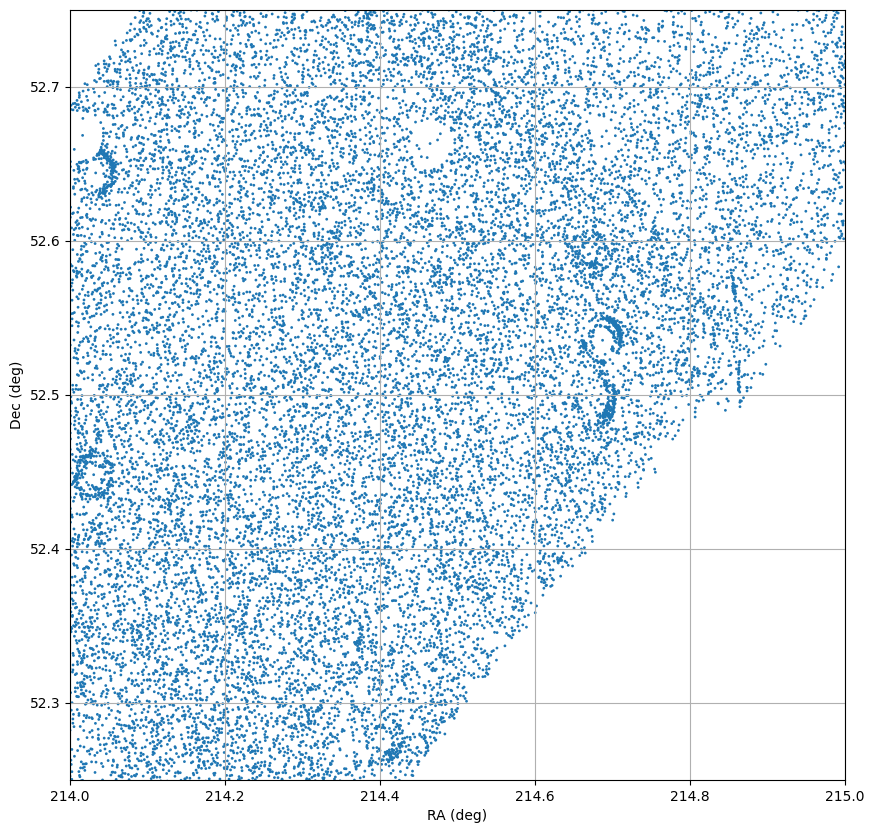

In [27]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_dual['ALPHA_J2000'], y=df_dual['DELTA_J2000'], s=4, 
            alpha=1, edgecolors='none')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.xlim(214, 215)
plt.ylim(52.25, 52.75)
plt.grid()
plt.show()

# SDSS data

In [3]:
df_dual = pd.read_csv('./data/604827.csv', comment='#')
df_dual

ALPHA_J2000  DELTA_J2000  \
0       214.881557    53.103476   
1       214.861588    53.115839   
2       215.061658    52.998000   
3       215.180854    52.927186   
4       214.907509    53.089148   
...            ...          ...   
64288   215.064895    52.812546   
64289   214.688544    53.040802   
64290   215.186475    52.737363   
64291   215.084326    52.799349   
64292   215.068525    52.809148   

                                               FLUX_AUTO  \
0      182.865799 48.724514 88.6793365 0.0 0.0 -6.065...   
1      -1.43247414 -5.36248398 -13.7104988 -3.3015868...   
2      60.7909508 -10.184761 11.6957092 2.27859354 2....   
3      -2.15251517 0.169828132 -14.6118746 3.21706223...   
4      18.92099 4.24113035 16.713026 7.06329823 10.50...   
...                                                  ...   
64288  10.4889164 -10.5139389 22.524107 42.2049637 37...   
64289  -15.3364697 43.9341125 0.500564694 9.28878117 ...   
64290  32.1980095 23.9194908 24.1457367 75.9638672 73...   
64291  34.7161293 34.0826416 10.7551117 18.9449844 47...   
64292  13.473361 17.2105522 19.2490139 24.3374424 40....   

                                        FLUX_RELERR_AUTO  CLASS_STAR  TILE_ID  
0      0.358887 1.130859 0.291016 0.0 0.0 -3.511719 0...       0.676     2406  
1      -10.078125 -1.453125 -0.279297 -0.666504 0.0 1...       0.516     2406  
2      0.522461 -0.840332 0.762207 0.0 0.0 1.136719 0...       0.685     2406  
3      -5.394531 112.625 -0.611816 0.0 0.0 1.46582 0....       0.573     2406  
4      3.087891 10.367188 1.134766 3.466797 0.0 0.645...       0.750     2406  
...                                                  ...         ...      ...  
64288  3.138672 -1.167969 0.703125 0.546387 0.820312 ...       0.160     2243  
64289  -0.79248 0.48584 25.78125 1.992188 -1.319336 -...       0.358     2243  
64290  0.785645 0.862305 0.494141 0.230591 0.31665 0....       0.938     2243  
64291  0.599609 0.513184 0.945801 0.785645 0.413818 0...       0.441     2243  
64292  1.398438 0.911621 0.467041 0.545898 0.437744 0...       0.462     2243  

[64293 rows x 6 columns]

In [3]:
ra_c = (df_dual['ALPHA_J2000'].max() + df_dual['ALPHA_J2000'].min()) / 2
dec_c = (df_dual['DELTA_J2000'].max() + df_dual['DELTA_J2000'].min()) / 2
ra_c, dec_c

(214.575034115, 52.67628441135)

In [4]:
ra_delta = df_dual['ALPHA_J2000'].max() - df_dual['ALPHA_J2000'].min()
dec_delta = df_dual['DELTA_J2000'].max() - df_dual['DELTA_J2000'].min()
ra_delta, dec_delta

(np.float64(2.827816296000009), np.float64(1.7266420528999973))

In [5]:
rad = 0.5 * u.deg
rad

<Quantity 0.5 deg>

In [5]:
coords = SkyCoord(ra=df_dual['ALPHA_J2000'], dec=df_dual['DELTA_J2000'], unit=(u.deg, u.deg), frame='icrs')
coords, len(coords)

(<SkyCoord (ICRS): (ra, dec) in deg
     [(214.88155692, 53.10347622), (214.86158834, 53.11583931),
      (215.06165824, 52.99799953), ..., (215.18647509, 52.73736272),
      (215.08432624, 52.79934893), (215.06852464, 52.80914842)]>,
 64293)

In [55]:
center = SkyCoord(ra=ra_c, dec=dec_c, unit=(u.deg, u.deg), frame='icrs')
xid = SDSS.query_region(center, radius=rad)
xid

/home/aesergeyev/code/python/venv/astro/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


<Table length=5021>
       ra              dec        ...      specobjid       run2d 
    float64          float64      ...        int64         bytes7
---------------- ---------------- ... ------------------- -------
214.176786200029 52.3035163817641 ... 8263039727776538624 v5_10_0
214.176786200029 52.3035163817641 ... 8263039727810093056 v5_10_0
214.176786200029 52.3035163817641 ... 8263039728195969024 v5_10_0
214.176786200029 52.3035163817641 ... 8263039740091015168 v5_10_0
214.176786200029 52.3035163817641 ... 8263039728799948800 v5_10_0
214.176786200029 52.3035163817641 ... 8263039728883834880 v5_10_0
214.176786200029 52.3035163817641 ... 8263039190519750656 v5_10_0
214.176786200029 52.3035163817641 ... 8263039190821740544 v5_10_0
214.176786200029 52.3035163817641 ... 8263039183641092096 v5_10_0
214.176786200029 52.3035163817641 ... 8263036991932702720 v5_10_0
             ...              ... ...                 ...     ...
214.903438768417 52.7974330286457 ... 7914005254198239232 v5_10_0
214.898252785436 52.9529748171654 ... 7917497853152305152 v5_10_0
214.939598121548 52.7800016505681 ... 7914004429564518400 v5_10_0
214.931606926307 52.9087136218256 ... 7914186123861008384 v5_10_0
214.937272227621 52.8965027790786 ... 7915279038301577216 v5_10_0
214.884840783696 52.7731570489042 ... 7917445901227892736 v5_10_0
214.919988101778 52.7889253396253 ... 7916360408004272128 v5_10_0
215.039806232187 52.8578575306106 ... 7917498128030212096 v5_10_0
214.834218318092 52.8937126521463 ... 7913071493847687168 v5_10_0
 214.92714282273 52.8403175454251 ... 7917498402908119040 v5_10_0

In [58]:
df_sdss = xid.to_pandas()
df_sdss

ra        dec                objid   run  rerun  camcol  field  \
0     214.176786  52.303516  1237659120933077028  3177    301       6     61   
1     214.176786  52.303516  1237659120933077028  3177    301       6     61   
2     214.176786  52.303516  1237659120933077028  3177    301       6     61   
3     214.176786  52.303516  1237659120933077028  3177    301       6     61   
4     214.176786  52.303516  1237659120933077028  3177    301       6     61   
...          ...        ...                  ...   ...    ...     ...    ...   
5016  214.884841  52.773157  1237661416602599961  3712    301       2    206   
5017  214.919988  52.788925  1237661416602599998  3712    301       2    206   
5018  215.039806  52.857858  1237661416602600105  3712    301       2    206   
5019  214.834218  52.893713  1237661416602600167  3712    301       2    206   
5020  214.927143  52.840318  1237661416602600241  3712    301       2    206   

             z  plate    mjd  fiberID            specobjid       run2d  
0     1.286294   7339  56747      219  8263039727776538624  b'v5_10_0'  
1     1.286476   7339  56749      219  8263039727810093056  b'v5_10_0'  
2     1.285890   7339  56772      219  8263039728195969024  b'v5_10_0'  
3     1.285039   7339  57481      219  8263039740091015168  b'v5_10_0'  
4     1.286080   7339  56808      219  8263039728799948800  b'v5_10_0'  
...        ...    ...    ...      ...                  ...         ...  
5016 -0.000314   7032  56471      428  7917445901227892736  b'v5_10_0'  
5017 -0.000499   7031  56449      575  7916360408004272128  b'v5_10_0'  
5018 -0.000154   7032  56471      618  7917498128030212096  b'v5_10_0'  
5019  0.733467   7028  56449      898  7913071493847687168  b'v5_10_0'  
5020  0.816962   7032  56471      619  7917498402908119040  b'v5_10_0'  

[5021 rows x 13 columns]

In [61]:
df_runs = df_sdss.value_counts(['run', 'camcol', 'field'])
df_runs

run   camcol  field
3712  2       203      462
      1       205      437
3177  6       61       389
              62       341
3712  2       204      239
3705  2       111      239
3712  1       207      236
3705  1       109      231
      2       112      206
3712  1       206      194
3705  1       111      187
              112      187
3712  2       206      183
3705  2       110      177
      1       113      166
3180  6       67       159
3712  2       205      131
      1       204      124
3180  6       66       116
3712  1       208      109
3180  6       69       106
3705  1       110       92
3177  6       63        83
              64        66
3180  6       68        64
      5       66        53
3712  2       202       11
3180  6       70         7
3712  2       207        6
      1       203        6
3705  2       109        6
      1       108        3
3180  6       65         2
3705  2       108        1
3180  5       67         1
3177  6       60         1
Name: co

In [64]:
run, camcol, field = df_runs.index[0]
imgs = SDSS.get_images(run=run, camcol=camcol, field=field)

In [80]:
w = WCS(imgs[0][0].header)
w

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 214.256748507  53.0595079902  
CRPIX : 1025.0  745.0  
CD1_1 CD1_2  : 4.53170116533e-05  0.000100199738371  
CD2_1 CD2_2  : 0.000100208676624  -4.53722094776e-05  
NAXIS : 2048  1489

In [76]:
data = imgs[0][0].data

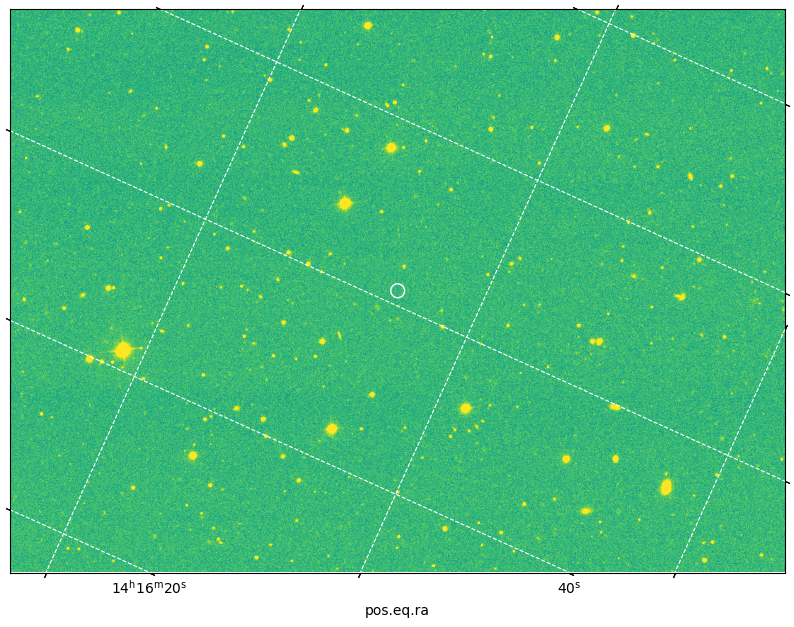

In [85]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=w) 
norm = simple_norm(data, 'sqrt', percent=99)
plt.imshow(imgs[0][0].data, norm=norm, origin='lower')
plt.grid(color='white', ls='dashed')
plt.scatter(214.256748507,  53.0595079902, transform=ax.get_transform('icrs'), s=100, edgecolor='white', facecolor='none')
plt.show()

# SDSS SQL query

In [3]:
df_dual = pd.read_csv('./data/604827.csv', comment='#')
df_dual

ALPHA_J2000  DELTA_J2000  \
0       214.881557    53.103476   
1       214.861588    53.115839   
2       215.061658    52.998000   
3       215.180854    52.927186   
4       214.907509    53.089148   
...            ...          ...   
64288   215.064895    52.812546   
64289   214.688544    53.040802   
64290   215.186475    52.737363   
64291   215.084326    52.799349   
64292   215.068525    52.809148   

                                               FLUX_AUTO  \
0      182.865799 48.724514 88.6793365 0.0 0.0 -6.065...   
1      -1.43247414 -5.36248398 -13.7104988 -3.3015868...   
2      60.7909508 -10.184761 11.6957092 2.27859354 2....   
3      -2.15251517 0.169828132 -14.6118746 3.21706223...   
4      18.92099 4.24113035 16.713026 7.06329823 10.50...   
...                                                  ...   
64288  10.4889164 -10.5139389 22.524107 42.2049637 37...   
64289  -15.3364697 43.9341125 0.500564694 9.28878117 ...   
64290  32.1980095 23.9194908 24.1457367 75.9638672 73...   
64291  34.7161293 34.0826416 10.7551117 18.9449844 47...   
64292  13.473361 17.2105522 19.2490139 24.3374424 40....   

                                        FLUX_RELERR_AUTO  CLASS_STAR  TILE_ID  
0      0.358887 1.130859 0.291016 0.0 0.0 -3.511719 0...       0.676     2406  
1      -10.078125 -1.453125 -0.279297 -0.666504 0.0 1...       0.516     2406  
2      0.522461 -0.840332 0.762207 0.0 0.0 1.136719 0...       0.685     2406  
3      -5.394531 112.625 -0.611816 0.0 0.0 1.46582 0....       0.573     2406  
4      3.087891 10.367188 1.134766 3.466797 0.0 0.645...       0.750     2406  
...                                                  ...         ...      ...  
64288  3.138672 -1.167969 0.703125 0.546387 0.820312 ...       0.160     2243  
64289  -0.79248 0.48584 25.78125 1.992188 -1.319336 -...       0.358     2243  
64290  0.785645 0.862305 0.494141 0.230591 0.31665 0....       0.938     2243  
64291  0.599609 0.513184 0.945801 0.785645 0.413818 0...       0.441     2243  
64292  1.398438 0.911621 0.467041 0.545898 0.437744 0...       0.462     2243  

[64293 rows x 6 columns]

In [3]:
query = f"""
SELECT 
   p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z, p.run, p.camcol, p.field, p.specObjID 
FROM PhotoPrimary AS p 
WHERE p.ra BETWEEN {df_dual['ALPHA_J2000'].min()} AND {df_dual['ALPHA_J2000'].max()} 
    AND p.dec BETWEEN {df_dual['DELTA_J2000'].min()} AND {df_dual['DELTA_J2000'].max()} 
    AND p.r BETWEEN 14 AND 22.0
"""
query

'\nSELECT \n   p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z, p.run, p.camcol, p.field, p.specObjID \nFROM PhotoPrimary AS p \nWHERE p.ra BETWEEN 213.161125967 AND 215.988942263 \n    AND p.dec BETWEEN 51.8129633849 AND 53.5396054378 \n    AND p.r BETWEEN 14 AND 22.0\n'

In [4]:
res = SDSS.query_sql(query)
df_sdss = res.to_pandas()
df_sdss

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396075096  213.412466  51.951525  20.21493  19.90540   
3      1237659120396075506  213.451475  51.937997  22.83068  21.99503   
4      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
...                    ...         ...        ...       ...       ...   
35025  1237661417676472975  215.983258  53.474071  22.88614  21.15311   
35026  1237661417676473009  215.960497  53.420538  23.53741  21.92297   
35027  1237661417676473043  215.981068  53.416345  25.33024  22.87429   
35028  1237661417676473237  215.935475  53.495656  23.42707  23.99033   
35029  1237661417676473269  215.982704  53.452228  23.09672  23.17206   

              r         i         z   run  camcol  field            specObjID  
0      20.27203  20.22480  20.04869  3177       5     58  8264196446053750784  
1      21.49035  20.82659  20.30259  3177       5     58                    0  
2      19.92216  19.91556  19.85427  3177       5     59  8264185970158753792  
3      21.38355  20.99575  20.77266  3177       5     59  7912892273452668928  
4      16.18532  16.04713  16.02548  3177       5     60                    0  
...         ...       ...       ...   ...     ...    ...                  ...  
35025  19.90563  19.43522  19.02002  3712       4    208                    0  
35026  20.44479  19.67033  19.23391  3712       4    208                    0  
35027  21.76340  21.29277  20.42080  3712       4    208                    0  
35028  21.88137  21.98825  23.00507  3712       4    208                    0  
35029  21.54395  21.49771  23.16442  3712       4    208                    0  

[35030 rows x 12 columns]

In [8]:
# df_sdss.to_csv("./data/sdss_22_init.csv", index=False)
df_sdss_init = pd.read_csv("./data/sdss_22_init.csv")
df_sdss_init

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396075096  213.412466  51.951525  20.21493  19.90540   
3      1237659120396075506  213.451475  51.937997  22.83068  21.99503   
4      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
...                    ...         ...        ...       ...       ...   
35025  1237661417676472975  215.983258  53.474071  22.88614  21.15311   
35026  1237661417676473009  215.960497  53.420538  23.53741  21.92297   
35027  1237661417676473043  215.981068  53.416345  25.33024  22.87429   
35028  1237661417676473237  215.935475  53.495656  23.42707  23.99033   
35029  1237661417676473269  215.982704  53.452228  23.09672  23.17206   

              r         i         z   run  camcol  field            specObjID  
0      20.27203  20.22480  20.04869  3177       5     58  8264196446053750784  
1      21.49035  20.82659  20.30259  3177       5     58                    0  
2      19.92216  19.91556  19.85427  3177       5     59  8264185970158753792  
3      21.38355  20.99575  20.77266  3177       5     59  7912892273452668928  
4      16.18532  16.04713  16.02548  3177       5     60                    0  
...         ...       ...       ...   ...     ...    ...                  ...  
35025  19.90563  19.43522  19.02002  3712       4    208                    0  
35026  20.44479  19.67033  19.23391  3712       4    208                    0  
35027  21.76340  21.29277  20.42080  3712       4    208                    0  
35028  21.88137  21.98825  23.00507  3712       4    208                    0  
35029  21.54395  21.49771  23.16442  3712       4    208                    0  

[35030 rows x 12 columns]

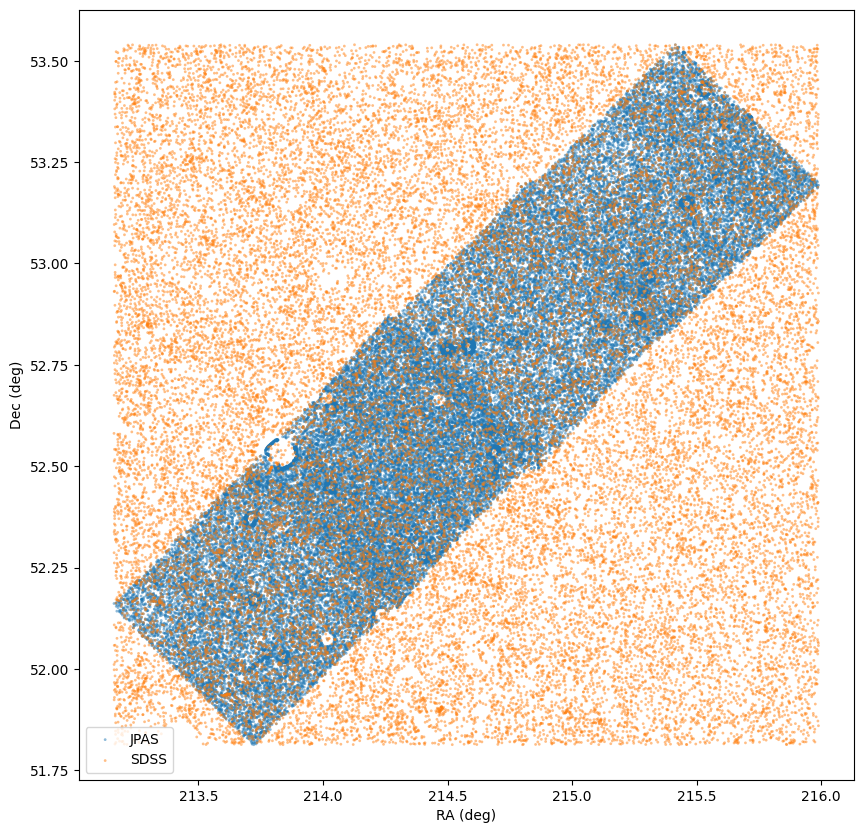

In [9]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_dual['ALPHA_J2000'], y=df_dual['DELTA_J2000'], s=4, 
            edgecolors='none', alpha=0.5, label='JPAS')
plt.scatter(x=df_sdss_init['ra'], y=df_sdss_init['dec'], s=4,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.legend()
plt.show()

In [20]:
jpcas_coords = SkyCoord(ra=df_dual['ALPHA_J2000'], dec=df_dual['DELTA_J2000'], unit=(u.deg, u.deg), frame='icrs')
sdss_coords = SkyCoord(ra=df_sdss_init['ra'], dec=df_sdss_init['dec'], unit=(u.deg, u.deg), frame='icrs')
jpcas_coords[:10]

<SkyCoord (ICRS): (ra, dec) in deg
    [(214.88155692, 53.10347622), (214.86158834, 53.11583931),
     (215.06165824, 52.99799953), (215.18085383, 52.92718615),
     (214.90750932, 53.08914797), (215.02297422, 53.02092993),
     (214.95391176, 53.06188013), (214.87433046, 53.10899829),
     (215.12066902, 52.96337478), (215.30519592, 52.85336498)]>

In [21]:
# remove sdss objects that close 1 arcsec each other
# idx, sep2d, _ = sdss_coords.match_to_catalog_sky(sdss_coords, nthneighbor=2)
# cond = sep2d.arcsec < 1
# sdss_coords = sdss_coords[~cond]
# df_sdss = df_sdss_init[~cond].reset_index()
# df_sdss


In [22]:
idx, sep2d, _ =  sdss_coords.match_to_catalog_sky(jpcas_coords)
idx.shape

(35030,)

In [23]:
df_sdss_init['jpas_idx'] = idx
df_sdss_init['sep2d'] = sep2d.arcsec
df_sdss_init

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396075096  213.412466  51.951525  20.21493  19.90540   
3      1237659120396075506  213.451475  51.937997  22.83068  21.99503   
4      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
...                    ...         ...        ...       ...       ...   
35025  1237661417676472975  215.983258  53.474071  22.88614  21.15311   
35026  1237661417676473009  215.960497  53.420538  23.53741  21.92297   
35027  1237661417676473043  215.981068  53.416345  25.33024  22.87429   
35028  1237661417676473237  215.935475  53.495656  23.42707  23.99033   
35029  1237661417676473269  215.982704  53.452228  23.09672  23.17206   

              r         i         z   run  camcol  field            specObjID  \
0      20.27203  20.22480  20.04869  3177       5     58  8264196446053750784   
1      21.49035  20.82659  20.30259  3177       5     58                    0   
2      19.92216  19.91556  19.85427  3177       5     59  8264185970158753792   
3      21.38355  20.99575  20.77266  3177       5     59  7912892273452668928   
4      16.18532  16.04713  16.02548  3177       5     60                    0   
...         ...       ...       ...   ...     ...    ...                  ...   
35025  19.90563  19.43522  19.02002  3712       4    208                    0   
35026  20.44479  19.67033  19.23391  3712       4    208                    0   
35027  21.76340  21.29277  20.42080  3712       4    208                    0   
35028  21.88137  21.98825  23.00507  3712       4    208                    0   
35029  21.54395  21.49771  23.16442  3712       4    208                    0   

       jpas_idx       sep2d  
0         21721    0.078537  
1         20164    0.052191  
2         19903  116.489557  
3         19980   93.947154  
4         35568    0.282189  
...         ...         ...  
35025     10128  688.462298  
35026     10153  521.038418  
35027     10124  544.963545  
35028     10136  668.844951  
35029     10153  632.359392  

[35030 rows x 14 columns]

In [32]:
cond = df_sdss_init["sep2d"] < 1
df_sdss = df_sdss_init[cond]
sdss_idx = np.array(df_sdss.index)
df_sdss['sdss_idx'] = df_sdss.index
df_sdss.reset_index(inplace=True, drop=True)
df_sdss

/tmp/ipykernel_14350/3981891386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sdss['sdss_idx'] = df_sdss.index


objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
3      1237659120396140967  213.686459  52.010739  22.64963  21.84366   
4      1237659120932946121  213.651526  52.329250  20.89500  18.39217   
...                    ...         ...        ...       ...       ...   
11224  1237661417139602408  215.786166  53.159142  21.70130  23.08870   
11225  1237661417139601866  215.646435  53.094276  24.54577  22.84830   
11226  1237661417139601850  215.627142  53.081659  22.64567  22.38203   
11227  1237661417139601410  215.599772  53.166277  18.41347  17.48721   
11228  1237661417139536785  215.466450  53.244510  21.51586  21.15982   

              r         i         z   run  camcol  field            specObjID  \
0      20.27203  20.22480  20.04869  3177       5     58  8264196446053750784   
1      21.49035  20.82659  20.30259  3177       5     58                    0   
2      16.18532  16.04713  16.02548  3177       5     60                    0   
3      21.53168  21.22415  20.97393  3177       5     60  8263060344039299072   
4      17.11214  16.51913  16.20456  3177       6     59                    0   
...         ...       ...       ...   ...     ...    ...                  ...   
11224  21.91027  20.72726  20.93438  3712       3    208                    0   
11225  20.99624  20.11850  19.59448  3712       3    208                    0   
11226  21.32424  23.87182  23.40334  3712       3    208                    0   
11227  17.34359  17.33805  17.37105  3712       3    208                    0   
11228  20.86529  19.70091  20.91512  3712       3    207                    0   

       jpas_idx     sep2d  sdss_idx  
0         21721  0.078537         0  
1         20164  0.052191         1  
2         35568  0.282189         4  
3         30366  0.007762         5  
4         36769  0.158345        15  
...         ...       ...       ...  
11224     26036  0.105546     34974  
11225     10862  0.139786     34975  
11226     11705  0.638891     34976  
11227     33105  0.293103     34977  
11228     33132  0.127277     34978  

[11229 rows x 15 columns]

In [33]:
df_sdss['jpas_idx'].max(), df_sdss['sdss_idx'].max()

(np.int64(64290), np.int64(34978))

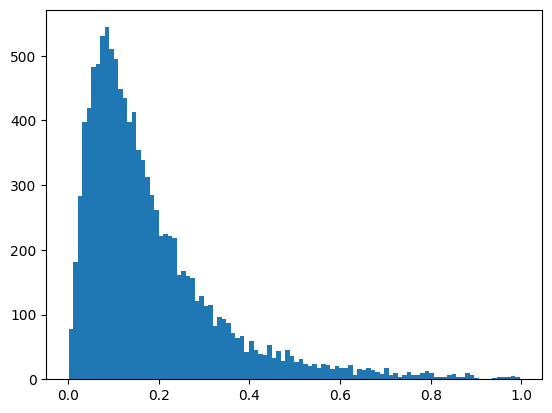

In [34]:
plt.hist(df_sdss['sep2d'], 
         bins=100, 
        #  range=(0, 2)
         )
plt.show()

In [13]:
# df_sdss_init = df_sdss.copy()
# df_sdss = df_sdss.iloc[idx]
# df_sdss

objid          ra        dec         u         g  \
23834  1237661386531602598  214.881002  53.103171  21.01314  18.44333   
19759  1237661386531602954  214.849506  53.116429  24.67554  22.26626   
4724   1237661386531668421  215.063779  53.011360  21.86699  21.48073   
22532  1237661386531733887  215.181673  52.928789  22.12696  22.32034   
22819  1237661386531602453  214.909839  53.086063  16.56582  15.16612   
...                    ...         ...        ...       ...       ...   
7906   1237661416602665327  215.064293  52.811605  22.55150  21.68178   
30973  1237661416602534359  214.681031  53.037238  24.03888  22.65613   
7857   1237661416602665245  215.186484  52.737385  25.21909  21.39892   
7931   1237661416602665744  215.087082  52.796653  24.53555  23.26519   
7906   1237661416602665327  215.064293  52.811605  22.55150  21.68178   

              r         i         z   run  camcol  field  specObjID  
23834  17.18055  16.68684  16.43361  3705       2    111          0  
19759  20.84376  20.35080  20.02091  3705       2    111          0  
4724   20.64998  19.72184  19.44651  3705       2    112          0  
22532  21.86063  21.53305  20.56747  3705       2    113          0  
22819  15.85857  14.97295  14.29874  3705       2    111          0  
...         ...       ...       ...   ...     ...    ...        ...  
7906   20.23207  19.54993  19.19487  3712       2    207          0  
30973  21.39801  20.57948  20.18521  3712       2    205          0  
7857   20.67319  20.46666  20.08990  3712       2    207          0  
7931   21.56516  21.44293  21.29300  3712       2    207          0  
7906   20.23207  19.54993  19.19487  3712       2    207          0  

[64293 rows x 12 columns]

In [11]:
max_sep = 1 * u.arcsec
cond = sep2d < max_sep
jpcas_matched = jpcas_coords[cond]
sdss_coords_matched = sdss_coords[idx[cond]]

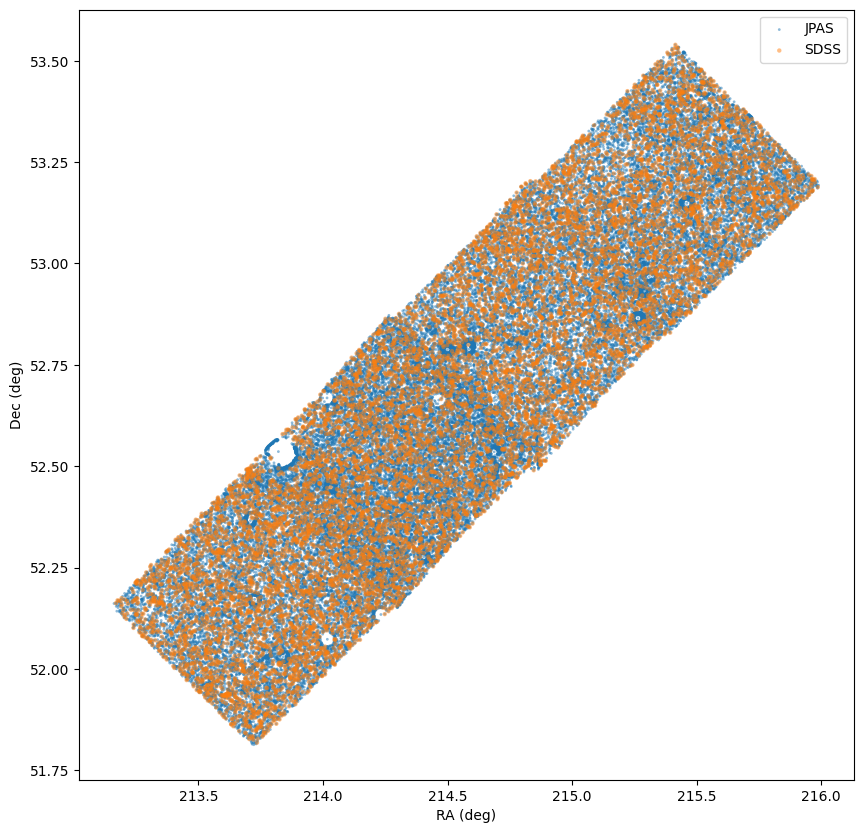

In [35]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_dual['ALPHA_J2000'], y=df_dual['DELTA_J2000'], s=4, 
            edgecolors='none', alpha=0.5, label='JPAS')
plt.scatter(x=df_sdss['ra'], y=df_sdss['dec'], s=10,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.legend()
plt.show()

# SDSS images

In [36]:
df_runs = df_sdss.value_counts(['run', 'camcol', 'field'])
df_runs

run   camcol  field
3177  6       61       443
              60       409
3180  5       66       398
3705  2       111      397
              113      384
      1       112      382
      2       112      373
3180  5       64       368
              65       360
3712  1       205      356
      2       205      352
3177  5       60       351
3712  3       207      343
3177  6       59       343
3712  1       204      342
3705  1       111      338
              110      332
3712  2       207      324
              206      322
3705  3       112      321
3712  1       206      318
      3       208      317
              206      273
3177  5       59       270
      6       62       253
3705  3       113      238
3177  5       61       200
3180  5       67       163
3712  1       203      160
      2       204      156
3180  6       67       150
3712  3       205      144
3180  6       66       142
3705  1       113      140
3180  6       65       139
3705  2       114      131
3177  5 

In [17]:
run, camcol, field = df_runs.index[0]
imgs = SDSS.get_images(run=run, camcol=camcol, field=field)
w = WCS(imgs[0][0].header)
data = imgs[0][0].data

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [18]:
cat_pixels = w.all_world2pix(df_sdss['ra'], df_sdss['dec'], 0)
cond_phot = ((cat_pixels[0] > 0) & (cat_pixels[0] < data.shape[1]) 
             & (cat_pixels[1] > 0) & (cat_pixels[1] < data.shape[0])
             & (df_sdss['r'] < 22)
)
cond_spec = cond_phot & (df_sdss['specObjID'] != 0)

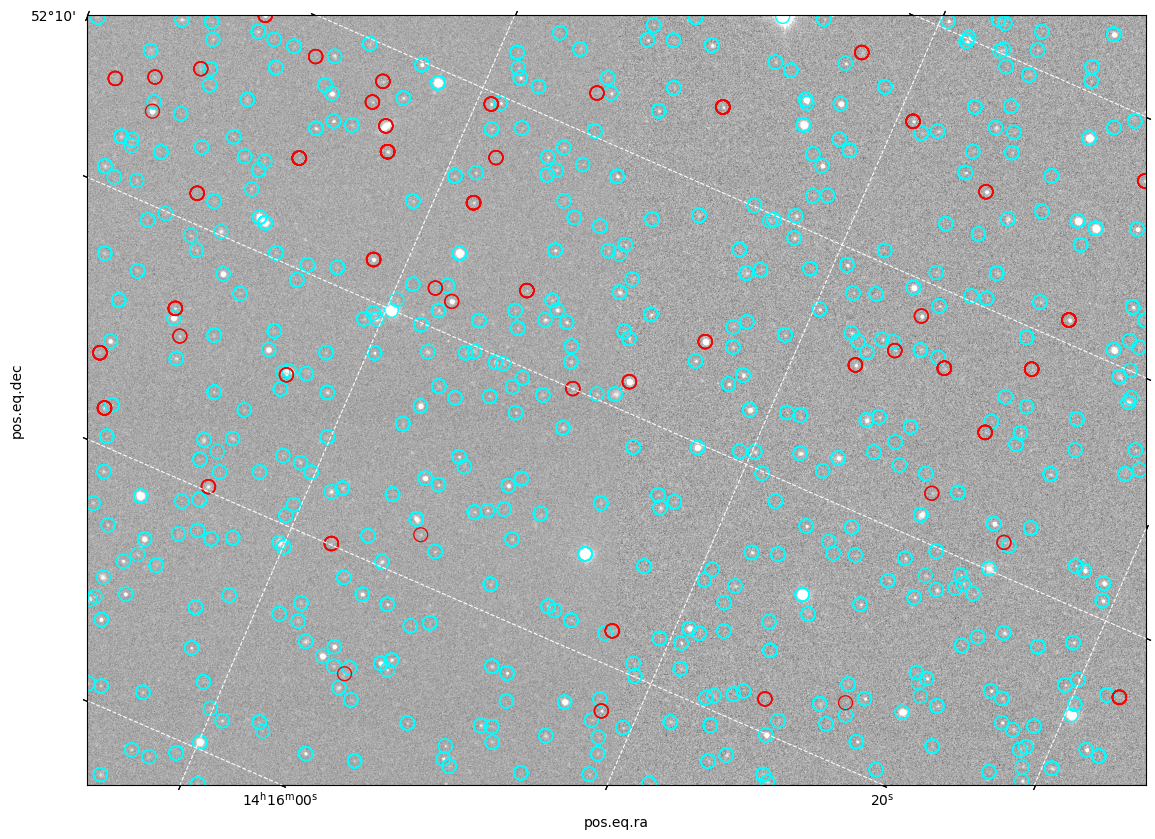

In [23]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection=w) 
norm = simple_norm(data, 'sqrt', percent=99.5)
plt.imshow(imgs[0][0].data, norm=norm, origin='lower', cmap='gray')
plt.grid(color='white', ls='dashed')
plt.scatter(df_sdss.loc[cond_phot, 'ra'],  df_sdss.loc[cond_phot, 'dec'], 
            transform=ax.get_transform('icrs'), s=100, 
            alpha = 1.0,
            edgecolor='cyan', facecolor='none')
plt.scatter(df_sdss.loc[cond_spec, 'ra'],  df_sdss.loc[cond_spec, 'dec'], 
            transform=ax.get_transform('icrs'), s=100, 
            alpha = 1.0,
            edgecolor='red', facecolor='none')
plt.show()

# Merge SDSS and JPAS data

In [37]:
df_merged = pd.merge(df_sdss, df_dual, left_on="jpas_idx", right_index=True, how="left")
df_merged

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
3      1237659120396140967  213.686459  52.010739  22.64963  21.84366   
4      1237659120932946121  213.651526  52.329250  20.89500  18.39217   
...                    ...         ...        ...       ...       ...   
11224  1237661417139602408  215.786166  53.159142  21.70130  23.08870   
11225  1237661417139601866  215.646435  53.094276  24.54577  22.84830   
11226  1237661417139601850  215.627142  53.081659  22.64567  22.38203   
11227  1237661417139601410  215.599772  53.166277  18.41347  17.48721   
11228  1237661417139536785  215.466450  53.244510  21.51586  21.15982   

              r         i         z   run  camcol  ...            specObjID  \
0      20.27203  20.22480  20.04869  3177       5  ...  8264196446053750784   
1      21.49035  20.82659  20.30259  3177       5  ...                    0   
2      16.18532  16.04713  16.02548  3177       5  ...                    0   
3      21.53168  21.22415  20.97393  3177       5  ...  8263060344039299072   
4      17.11214  16.51913  16.20456  3177       6  ...                    0   
...         ...       ...       ...   ...     ...  ...                  ...   
11224  21.91027  20.72726  20.93438  3712       3  ...                    0   
11225  20.99624  20.11850  19.59448  3712       3  ...                    0   
11226  21.32424  23.87182  23.40334  3712       3  ...                    0   
11227  17.34359  17.33805  17.37105  3712       3  ...                    0   
11228  20.86529  19.70091  20.91512  3712       3  ...                    0   

       jpas_idx     sep2d  sdss_idx  ALPHA_J2000  DELTA_J2000  \
0         21721  0.078537         0   213.268111    52.116478   
1         20164  0.052191         1   213.203459    52.128431   
2         35568  0.282189         4   213.759182    52.055734   
3         30366  0.007762         5   213.686463    52.010739   
4         36769  0.158345        15   213.651566    52.329213   
...         ...       ...       ...          ...          ...   
11224     26036  0.105546     34974   215.786123    53.159128   
11225     10862  0.139786     34975   215.646403    53.094310   
11226     11705  0.638891     34976   215.627436    53.081669   
11227     33105  0.293103     34977   215.599807    53.166198   
11228     33132  0.127277     34978   215.466440    53.244545   

                                               FLUX_AUTO  \
0      428.658691 308.865997 384.88208 278.647003 361...   
1      45.5922813 21.9729233 37.9543076 22.007618 12....   
2      6429.23193 6839.23438 6717.17969 8188.37354 98...   
3      47.6247559 118.16404 49.0911674 56.4392166 89....   
4      331.251312 372.356964 411.324707 643.066467 10...   
...                                                  ...   
11224  30.2855377 10.1931648 5.93644333 21.1268482 17...   
11225  15.9276161 -1.2253952 21.9397602 -29.8224621 2...   
11226  -36.9475937 106.413177 32.0627708 43.58815 54....   
11227  3147.09888 3940.67407 4550.96729 4933.86182 48...   
11228  -37.3740158 53.2009926 22.4615402 24.3613911 3...   

                                        FLUX_RELERR_AUTO CLASS_STAR  TILE_ID  
0      0.053864 0.14563 0.043213 0.078796 0.111389 0....      0.054     2470  
1      0.659668 2.046875 0.423828 1.140625 0.45166 1....      0.012     2470  
2      0.006107 0.011581 0.004803 0.005161 0.006771 0...      0.864     2470  
3      0.421387 0.322998 0.286865 0.317627 0.381836 2...      0.544     2470  
4      0.102722 0.186157 0.061005 0.05188 0.060608 0....      0.852     2470  
...                                                  ...        ...      ...  
11224  1.010742 3.609375 2.679688 1.202148 1.174805 -...      0.002     2406  
11225  1.392578 -9.703125 0.501953 -0.269287 0.589355...     

<Axes: >

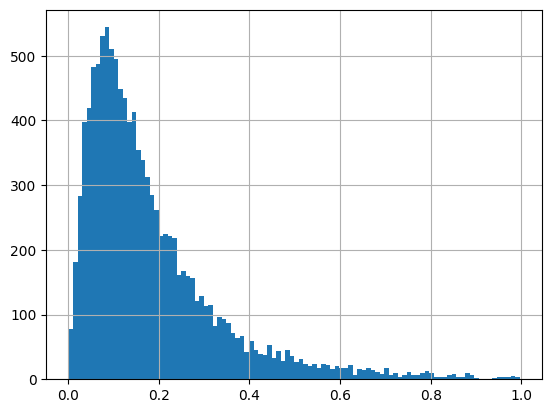

In [38]:
df_merged['sep2d'].hist(bins=100)

In [4]:
# df_merged.to_csv('../data/merged2.csv', index=False)
df_merged = pd.read_csv('../data/merged2.csv')
df_merged

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
3      1237659120396140967  213.686459  52.010739  22.64963  21.84366   
4      1237659120932946121  213.651526  52.329250  20.89500  18.39217   
...                    ...         ...        ...       ...       ...   
11224  1237661417139602408  215.786166  53.159142  21.70130  23.08870   
11225  1237661417139601866  215.646435  53.094276  24.54577  22.84830   
11226  1237661417139601850  215.627142  53.081659  22.64567  22.38203   
11227  1237661417139601410  215.599772  53.166277  18.41347  17.48721   
11228  1237661417139536785  215.466450  53.244510  21.51586  21.15982   

              r         i         z   run  camcol  ...            specObjID  \
0      20.27203  20.22480  20.04869  3177       5  ...  8264196446053750784   
1      21.49035  20.82659  20.30259  3177       5  ...                    0   
2      16.18532  16.04713  16.02548  3177       5  ...                    0   
3      21.53168  21.22415  20.97393  3177       5  ...  8263060344039299072   
4      17.11214  16.51913  16.20456  3177       6  ...                    0   
...         ...       ...       ...   ...     ...  ...                  ...   
11224  21.91027  20.72726  20.93438  3712       3  ...                    0   
11225  20.99624  20.11850  19.59448  3712       3  ...                    0   
11226  21.32424  23.87182  23.40334  3712       3  ...                    0   
11227  17.34359  17.33805  17.37105  3712       3  ...                    0   
11228  20.86529  19.70091  20.91512  3712       3  ...                    0   

       jpas_idx     sep2d  sdss_idx  ALPHA_J2000  DELTA_J2000  \
0         21721  0.078537         0   213.268111    52.116478   
1         20164  0.052191         1   213.203459    52.128431   
2         35568  0.282189         4   213.759182    52.055734   
3         30366  0.007762         5   213.686463    52.010739   
4         36769  0.158345        15   213.651566    52.329213   
...         ...       ...       ...          ...          ...   
11224     26036  0.105546     34974   215.786123    53.159128   
11225     10862  0.139786     34975   215.646403    53.094310   
11226     11705  0.638891     34976   215.627436    53.081669   
11227     33105  0.293103     34977   215.599807    53.166198   
11228     33132  0.127277     34978   215.466440    53.244545   

                                               FLUX_AUTO  \
0      428.658691 308.865997 384.88208 278.647003 361...   
1      45.5922813 21.9729233 37.9543076 22.007618 12....   
2      6429.23193 6839.23438 6717.17969 8188.37354 98...   
3      47.6247559 118.16404 49.0911674 56.4392166 89....   
4      331.251312 372.356964 411.324707 643.066467 10...   
...                                                  ...   
11224  30.2855377 10.1931648 5.93644333 21.1268482 17...   
11225  15.9276161 -1.2253952 21.9397602 -29.8224621 2...   
11226  -36.9475937 106.413177 32.0627708 43.58815 54....   
11227  3147.09888 3940.67407 4550.96729 4933.86182 48...   
11228  -37.3740158 53.2009926 22.4615402 24.3613911 3...   

                                        FLUX_RELERR_AUTO CLASS_STAR  TILE_ID  
0      0.053864 0.14563 0.043213 0.078796 0.111389 0....      0.054     2470  
1      0.659668 2.046875 0.423828 1.140625 0.45166 1....      0.012     2470  
2      0.006107 0.011581 0.004803 0.005161 0.006771 0...      0.864     2470  
3      0.421387 0.322998 0.286865 0.317627 0.381836 2...      0.544     2470  
4      0.102722 0.186157 0.061005 0.05188 0.060608 0....      0.852     2470  
...                                                  ...        ...      ...  
11224  1.010742 3.609375 2.679688 1.202148 1.174805 -...      0.002     2406  
11225  1.392578 -9.703125 0.501953 -0.269287 0.589355...     

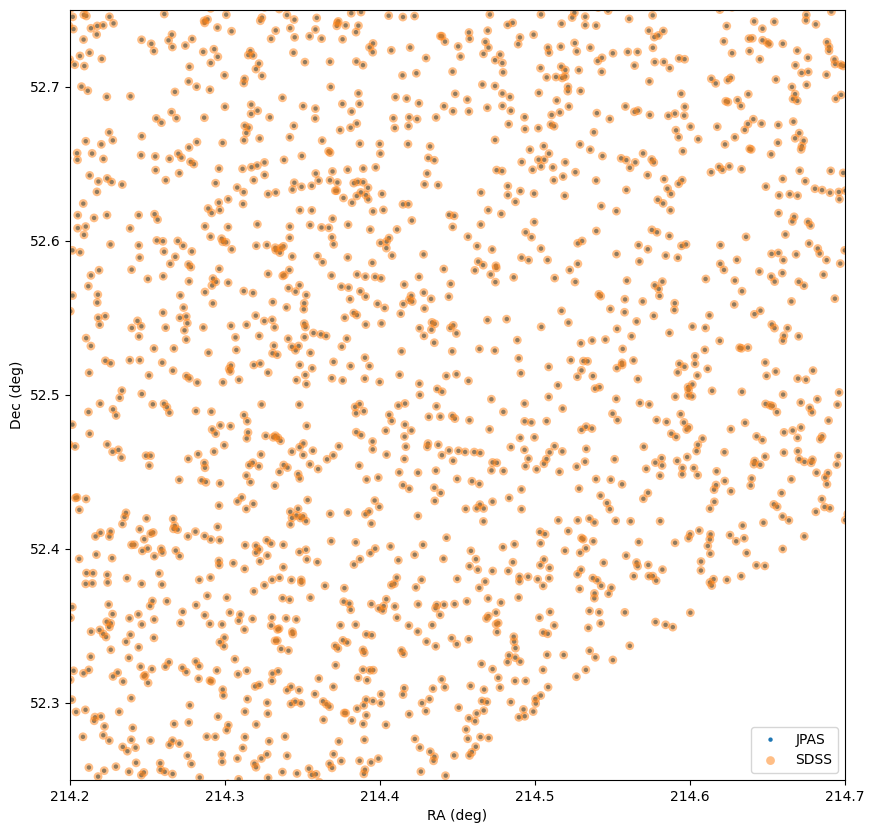

In [5]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_merged['ALPHA_J2000'], y=df_merged['DELTA_J2000'], s=10, 
            edgecolors='none', alpha=1.0, label='JPAS')
plt.scatter(x=df_merged['ra'], y=df_merged['dec'], s=40,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.xlim(214.2, 214.7)
plt.ylim(52.25, 52.75)
plt.legend()
plt.show()

# Flux analysis

In [6]:
df_merged = pd.read_csv('../data/merged2.csv')
df_merged

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
3      1237659120396140967  213.686459  52.010739  22.64963  21.84366   
4      1237659120932946121  213.651526  52.329250  20.89500  18.39217   
...                    ...         ...        ...       ...       ...   
11224  1237661417139602408  215.786166  53.159142  21.70130  23.08870   
11225  1237661417139601866  215.646435  53.094276  24.54577  22.84830   
11226  1237661417139601850  215.627142  53.081659  22.64567  22.38203   
11227  1237661417139601410  215.599772  53.166277  18.41347  17.48721   
11228  1237661417139536785  215.466450  53.244510  21.51586  21.15982   

              r         i         z   run  camcol  ...            specObjID  \
0      20.27203  20.22480  20.04869  3177       5  ...  8264196446053750784   
1      21.49035  20.82659  20.30259  3177       5  ...                    0   
2      16.18532  16.04713  16.02548  3177       5  ...                    0   
3      21.53168  21.22415  20.97393  3177       5  ...  8263060344039299072   
4      17.11214  16.51913  16.20456  3177       6  ...                    0   
...         ...       ...       ...   ...     ...  ...                  ...   
11224  21.91027  20.72726  20.93438  3712       3  ...                    0   
11225  20.99624  20.11850  19.59448  3712       3  ...                    0   
11226  21.32424  23.87182  23.40334  3712       3  ...                    0   
11227  17.34359  17.33805  17.37105  3712       3  ...                    0   
11228  20.86529  19.70091  20.91512  3712       3  ...                    0   

       jpas_idx     sep2d  sdss_idx  ALPHA_J2000  DELTA_J2000  \
0         21721  0.078537         0   213.268111    52.116478   
1         20164  0.052191         1   213.203459    52.128431   
2         35568  0.282189         4   213.759182    52.055734   
3         30366  0.007762         5   213.686463    52.010739   
4         36769  0.158345        15   213.651566    52.329213   
...         ...       ...       ...          ...          ...   
11224     26036  0.105546     34974   215.786123    53.159128   
11225     10862  0.139786     34975   215.646403    53.094310   
11226     11705  0.638891     34976   215.627436    53.081669   
11227     33105  0.293103     34977   215.599807    53.166198   
11228     33132  0.127277     34978   215.466440    53.244545   

                                               FLUX_AUTO  \
0      428.658691 308.865997 384.88208 278.647003 361...   
1      45.5922813 21.9729233 37.9543076 22.007618 12....   
2      6429.23193 6839.23438 6717.17969 8188.37354 98...   
3      47.6247559 118.16404 49.0911674 56.4392166 89....   
4      331.251312 372.356964 411.324707 643.066467 10...   
...                                                  ...   
11224  30.2855377 10.1931648 5.93644333 21.1268482 17...   
11225  15.9276161 -1.2253952 21.9397602 -29.8224621 2...   
11226  -36.9475937 106.413177 32.0627708 43.58815 54....   
11227  3147.09888 3940.67407 4550.96729 4933.86182 48...   
11228  -37.3740158 53.2009926 22.4615402 24.3613911 3...   

                                        FLUX_RELERR_AUTO CLASS_STAR  TILE_ID  
0      0.053864 0.14563 0.043213 0.078796 0.111389 0....      0.054     2470  
1      0.659668 2.046875 0.423828 1.140625 0.45166 1....      0.012     2470  
2      0.006107 0.011581 0.004803 0.005161 0.006771 0...      0.864     2470  
3      0.421387 0.322998 0.286865 0.317627 0.381836 2...      0.544     2470  
4      0.102722 0.186157 0.061005 0.05188 0.060608 0....      0.852     2470  
...                                                  ...        ...      ...  
11224  1.010742 3.609375 2.679688 1.202148 1.174805 -...      0.002     2406  
11225  1.392578 -9.703125 0.501953 -0.269287 0.589355...     

In [7]:
def to_array(x):
    return np.array([float(i) for i in x.split()])

df_flux = df_merged['FLUX_AUTO']
df_filter = pd.read_csv('./data/611913.csv', comment='#')
df_wavelength = df_filter['wavelength']
df_flux = df_flux.str.split(' ', expand=True).astype(float)
df_flux.columns = [df_filter['wavelength'][i] for i in df_flux.columns]
df_flux

3497         3782         3904         3996         4110  \
0       428.658691   308.865997   384.882080   278.647003   361.446442   
1        45.592281    21.972923    37.954308    22.007618    12.640756   
2      6429.231930  6839.234380  6717.179690  8188.373540  9891.036130   
3        47.624756   118.164040    49.091167    56.439217    89.834892   
4       331.251312   372.356964   411.324707   643.066467  1033.802250   
...            ...          ...          ...          ...          ...   
11224    30.285538    10.193165     5.936443    21.126848    17.796532   
11225    15.927616    -1.225395    21.939760   -29.822462    24.239641   
11226   -36.947594   106.413177    32.062771    43.588150    54.667030   
11227  3147.098880  3940.674070  4550.967290  4933.861820  4857.057130   
11228   -37.374016    53.200993    22.461540    24.361391    30.019119   

              4203         4303         4403          4503          4603  ...  \
0       329.904541   373.368713   294.262573    388.088928    303.253723  ...   
1        39.618355    21.870281    32.347305    -28.031401     23.629484  ...   
2      9819.850590  9222.009770  9935.850590  10933.725600  10905.127900  ...   
3        16.295548    74.441139    64.283310     70.093681     47.715321  ...   
4       887.056641  1059.994510  1540.379270   1986.656130   2288.412110  ...   
...            ...          ...          ...           ...           ...  ...   
11224   -24.746517    22.876118    39.852066     -0.240590      4.930181  ...   
11225   -11.013321    29.881607    13.242824     22.658485     38.121796  ...   
11226   107.455605    47.222183    63.994282    162.226089     70.151825  ...   
11227  5259.936040  4655.021480  4700.866700   4793.632320   4718.938960  ...   
11228     4.391259    17.691521   -11.383204    -72.926178     28.984285  ...   

              8716         8810         8912         9000         9107  \
0       115.620277   121.908005   109.617432    85.042366    80.784210   
1        10.348244     9.803634    -4.148968    19.073219     4.000984   
2      5574.808110  5550.260250  5090.215820  4869.805660  5064.409180   
3        39.833759     8.877821    51.904533    40.474384    40.142117   
4      4573.188960  4554.304200  4338.682620  4247.596190  4394.168950   
...            ...          ...          ...          ...          ...   
11224     9.100890    65.591621    36.135643    44.240223   -10.062006   
11225   122.078468   136.488647   130.862381   131.511703   155.036331   
11226    16.436688    -5.416476    -2.866711   -28.517208   -22.368950   
11227  1433.196410  1428.044430  1422.888670  1416.839600  1400.028200   
11228    19.884501    21.141523   -21.383547    16.180847    -0.673573   

              9316         3623          4750         6250         7725  
0        77.960510   348.759430    290.605560   189.218094   163.329941  
1         8.714289    34.998966     30.923809    70.149841    79.484497  
2      4517.976070  6254.568360  10038.346700  9067.625000  6860.720210  
3        34.061413    45.039337     70.858406    49.707184    45.483406  
4      4252.207030   396.522980   2037.473510  3981.002690  4632.118650  
...            ...          ...           ...          ...          ...  
11224    21.221300    -4.004103     14.583567    26.111908    25.467243  
11225   140.461609     6.092162     27.302874    86.375099   140.202820  
11226    11.541579    10.152276     47.978416    36.766716    33.168705  
11227  1135.339600  3628.869870   4287.578610  3004.959470  1978.652100  
11228   -13.094439    45.989357     11.591095    11.028273    12.593917  

[11229 rows x 60 columns]

Task:
Take JPAS band fluxes at 6000A and the SDSS r band magnitude
build a plot of the JPAS flux 6000A vs the SDSS r band magnitude
mag = -2.5 * log10(flux) 

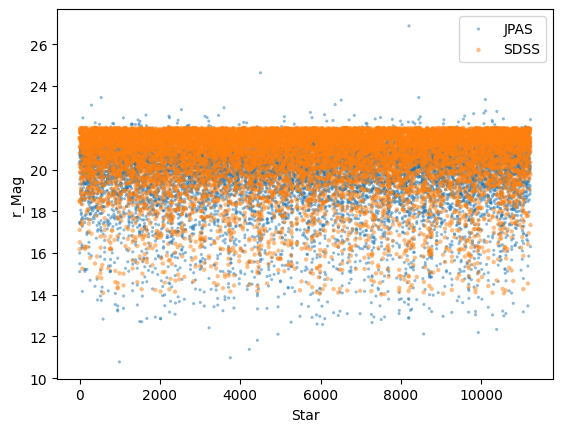

In [54]:
rSDSS_ID = 58 
df_filter.loc[rSDSS_ID]
r_mags = pd.DataFrame({'r_jpas': df_flux[df_filter.loc[rSDSS_ID]['wavelength']],
                       'r_sdss': df_merged['r']})
r_mags['r_jpas'] = r_mags['r_jpas'].apply(lambda row : -2.5 * np.log10(row * 1e-10))
# figure1 = plt.figure(figsize=(10, 10))
plt.scatter(x=r_mags.index, y=r_mags['r_jpas'], s=5, 
            edgecolors='none', alpha=0.5, label='JPAS')
plt.scatter(x=r_mags.index, y=r_mags['r_sdss'], s=10,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('Star')
plt.ylabel('r_Mag')
plt.legend()
plt.show()

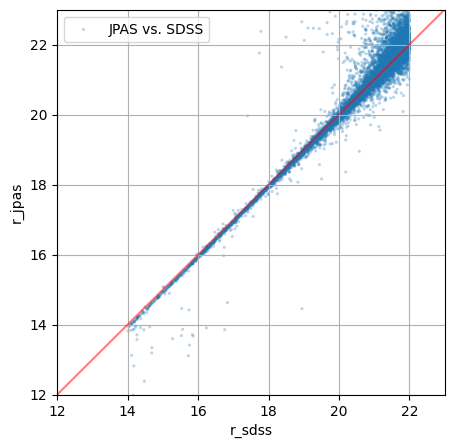

In [76]:
df_filter.loc[rSDSS_ID]
r_mags = pd.DataFrame({'r_jpas': df_flux[df_filter.loc[rSDSS_ID]['wavelength']],
                       'r_sdss': df_merged['r']})
r_mags['r_jpas_mag'] = r_mags['r_jpas'].apply(lambda row : 26-2.5 * np.log10(row))

figure1 = plt.figure(figsize=(5, 5))
plt.plot([12, 23], [12, 23], color="red", alpha=0.5)
plt.scatter(x=r_mags['r_sdss'], y=r_mags['r_jpas_mag'], s=5, 
            edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.xlabel('r_sdss')
plt.ylabel('r_jpas')
plt.xlim(12, 23)
plt.ylim(12, 23)
plt.grid()
plt.legend()
plt.show()

# Compare SDSS spectra with JPAS